In [4]:
import qiskit
import qc_grader
print(f"Qiskit version: {qiskit.__version__}")
print(f"Grader version: {qc_grader.__version__}")

Qiskit version: 2.1.0
Grader version: 0.22.9


In [5]:
# Check that the account has been saved properly
from qiskit_ibm_runtime import QiskitRuntimeService


service = QiskitRuntimeService(name="qgss-2025")
service.saved_accounts()

{'qgss-2025': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': 'j4MxUf6EZ0xR8RxcjXJ1w6MIfv1u-NoxO3AXSBGRiTIR',
  'instance': 'crn:v1:bluemix:public:quantum-computing:us-east:a/f45e667ab0174f6d860e44a5b8aea0af:f81a572d-0e39-446e-b820-3ada6c1ac0aa::',
  'verify': True,
  'private_endpoint': False}}

In [6]:
# Essential libraries
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import io

from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit_ibm_runtime import Options, Session, SamplerV2 as Sampler
from qiskit.result import marginal_distribution

from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator

from qc_grader.challenges.qgss_2025 import (
    grade_lab1_ex1_1, 
    grade_lab1_ex1_2, 
    grade_lab1_ex1_3, 
    grade_lab1_ex1_4, 
    grade_lab1_ex2, 
    grade_lab1_ex3,
    grade_lab1_ex4,
    grade_lab1_ex5,
    grade_lab1_ex6
)
# Essential libraries
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import io

from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit_ibm_runtime import Options, Session, SamplerV2 as Sampler
from qiskit.result import marginal_distribution

from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator

from qc_grader.challenges.qgss_2025 import (
    grade_lab1_ex1_1, 
    grade_lab1_ex1_2, 
    grade_lab1_ex1_3, 
    grade_lab1_ex1_4, 
    grade_lab1_ex2, 
    grade_lab1_ex3,
    grade_lab1_ex4,
    grade_lab1_ex5,
    grade_lab1_ex6
)


In [7]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

double_slit = QuantumCircuit(qr, cr)

# Apply Hadamard gate to create superposition (simulate particle passing through both slits)
double_slit.h(qr[0])


In [8]:
# Submit your answer using the following code
grade_lab1_ex1_1(double_slit)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


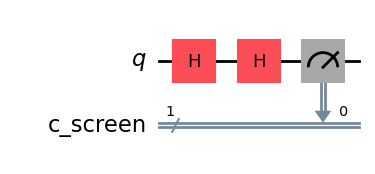

In [9]:
# your code here

# Apply Hadamard again to simulate interference at the center of the screen
double_slit.h(qr[0])

# Measure the qubit and store the result in c_screen
double_slit.measure(qr[0], cr[0])

# end of your code
double_slit.draw('mpl')


In [10]:
# Submit your answer using the following code
grade_lab1_ex1_2(double_slit)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


In [11]:
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

backend = AerSimulator()

pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
qc_isa = pm.run(double_slit)

# Run the circuit on AerSimulator directly
job = backend.run(qc_isa, shots=1000)
result = job.result()

counts = result.get_counts(qc_isa)

plot_histogram(counts)
plt.show()


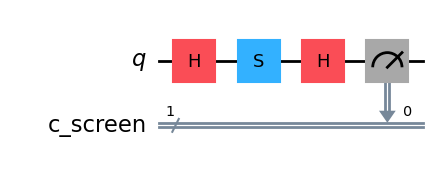

In [12]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

double_slit_with_difference = QuantumCircuit(qr, cr)
double_slit_with_difference.h(qr[0])

# your code here
# Apply a phase (e.g., S gate) to |1> state to introduce phase difference
double_slit_with_difference.s(qr[0])
# end of your code

double_slit_with_difference.h(qr[0])
double_slit_with_difference.measure(qr[0], cr[0])

double_slit_with_difference.draw('mpl')


In [13]:
# Submit your answer using the following code
grade_lab1_ex1_3(double_slit_with_difference)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


In [14]:
job = backend.run(qc_isa, shots=10000)
result = job.result()
counts = result.get_counts(qc_isa)
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

plot_histogram(counts)
plt.show()

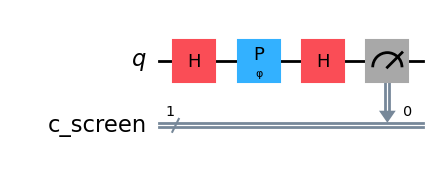

In [15]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter

# Define parameter
φ = Parameter('φ')

# Quantum and Classical Registers
qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

# Create the circuit
double_slit_fringe = QuantumCircuit(qr, cr)

# Your code here
double_slit_fringe.h(qr[0])           # First Hadamard gate
double_slit_fringe.p(φ, qr[0])        # Phase shift using parameter φ
double_slit_fringe.h(qr[0])           # Second Hadamard gate
double_slit_fringe.measure(qr[0], cr[0])  # Measurement
# End of your code

double_slit_fringe.draw('mpl')


In [16]:
# Submit your answer using the following code
grade_lab1_ex1_4(double_slit_fringe)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


In [17]:
# Check that the account has been saved properly
from qiskit_ibm_runtime import QiskitRuntimeService


service = QiskitRuntimeService(name="qgss-2025")
service.saved_accounts()

{'qgss-2025': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': 'j4MxUf6EZ0xR8RxcjXJ1w6MIfv1u-NoxO3AXSBGRiTIR',
  'instance': 'crn:v1:bluemix:public:quantum-computing:us-east:a/f45e667ab0174f6d860e44a5b8aea0af:f81a572d-0e39-446e-b820-3ada6c1ac0aa::',
  'verify': True,
  'private_endpoint': False}}

In [18]:
from PIL import Image

happy_img = Image.open("happy.png")
grumpy_img = Image.open("grumpy.png")

happy_img.show()
grumpy_img.show()


In [19]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Sampler
import numpy as np

def schrodingers_cat_experiment_theta(theta):
    qc = QuantumCircuit(1)

    # --- Your code starts here ---
    qc.rx(theta, 0)  # Rotate around X-axis by theta radians
    # --- Your code ends here ---

    qc.measure_all()
    
    backend = AerSimulator()
    pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
    qc_isa = pm.run(qc)

    # Circuit compile and run with 1 shot
    sampler = Sampler(mode=backend)
    counts = sampler.run([qc_isa], shots=1).result()[0].data.meas.get_counts()

    measured_state = list(counts.keys())[0] if counts else '0'  # bring measured result

    if measured_state == '0':
        cat_happy = True
    else:
        cat_happy = False

    return cat_happy, qc


In [20]:
# Submit your answer using the following code
grade_lab1_ex2(schrodingers_cat_experiment_theta)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


In [21]:
import io
import numpy as np
import ipywidgets as widgets
from PIL import Image
from IPython.display import display

# Load images (they must be in the same folder as this notebook)
happy_img = Image.open('happy.png')
grumpy_img = Image.open('grumpy.png')

# Output area
out = widgets.Output()

# Slider to control theta
slider = widgets.FloatSlider(
    value=0,
    min=0,
    max=2 * np.pi,
    step=0.01,
    description='θ',
    continuous_update=True
)

# Button to "open the box"
button = widgets.Button(
    description='Open the Box',
    button_style='success'
)

# Define what happens when button is clicked
def on_button_click(b):
    with out:
        out.clear_output(wait=True)

        result = schrodingers_cat_experiment_theta(slider.value)[0]

        if result == True:
            img = happy_img
            txt = "happy"
        else:
            img = grumpy_img
            txt = "grumpy"

        new_size = (400, 400)
        resized_img = img.resize(new_size)

        buf = io.BytesIO()
        resized_img.save(buf, format='PNG')
        buf.seek(0)

        probability = int(np.cos(slider.value / 2)**2 * 100)

        display(f"The probability the cat is happy: {probability}%")
        display(f"The observed cat is: {txt}")
        display(widgets.Image(value=buf.read(), format='png'))

# Connect button click to handler
button.on_click(on_button_click)

# Show UI
display(slider, button, out)


FloatSlider(value=0.0, description='θ', max=6.283185307179586, step=0.01)

Button(button_style='success', description='Open the Box', style=ButtonStyle())

Output()

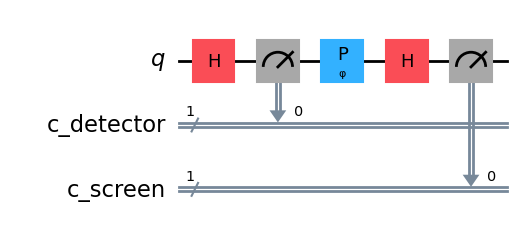

In [22]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter

# Registers
qr = QuantumRegister(1, name='q')
cr1 = ClassicalRegister(1, name='c_detector')  # which-path detector
cr2 = ClassicalRegister(1, name='c_screen')    # final measurement

# Circuit
double_slit_with_detector = QuantumCircuit(qr, cr1, cr2)

# Parameter
φ = Parameter('φ')

# --- Your code starts here ---

double_slit_with_detector.h(qr[0])               # First Hadamard (superposition)
double_slit_with_detector.measure(qr[0], cr1[0]) # Which-path measurement

double_slit_with_detector.p(φ, qr[0])            # Phase shift
double_slit_with_detector.h(qr[0])               # Second Hadamard
double_slit_with_detector.measure(qr[0], cr2[0]) # Final measurement at screen

# --- Your code ends here ---

double_slit_with_detector.draw('mpl')


In [23]:
# Submit your answer using the following code
grade_lab1_ex3(double_slit_with_detector)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


In [24]:
from qiskit import QuantumCircuit
import numpy as np

def create_chsh_circuit(x, y):
    """Builds Qiskit circuit for Alice & Bob's quantum strategy."""

    qc = QuantumCircuit(2, 2, name=f'CHSH_{x}{y}')  # 2 qubits, 2 classical bits

    # ---- Task 1: Create Bell state |Φ+> = (|00> + |11>)/√2 ----
    qc.h(0)
    qc.cx(0, 1)

    qc.barrier()

    # ---- Step 2a: Alice's measurement basis ----
    # x=0: measure in Z basis (do nothing)
    # x=1: measure in X basis (apply H)
    if x == 1:
        qc.h(0)

    # ---- Task 2b: Bob's measurement basis rotations ----
    # Bob measures at angle -π/4 if y=0, π/4 if y=1
    # Implemented as Ry rotations on qubit 1:
    if y == 0:
        qc.ry(-np.pi / 4, 1)
    else:
        qc.ry(np.pi / 4, 1)

    qc.barrier()

    # ---- Step 3: Measure ----
    # Map qubits to classical bits (q0->c0, q1->c1)
    qc.measure([0, 1], [0, 1])

    return qc


In [25]:
# Submit your answer using the following code
grade_lab1_ex4(create_chsh_circuit)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


Quantum circuit for inputs x=1, y=1 (Check your Exercises 1 & 2 implementation):


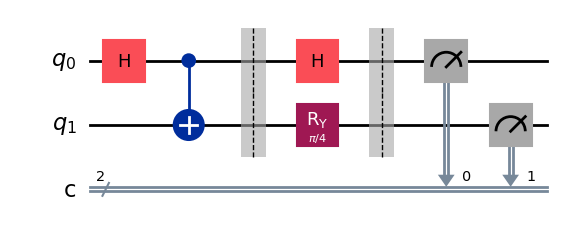

In [26]:
circuits = []
input_pairs = []

for x_in in [0, 1]:
    for y_in in [0, 1]:
        input_pairs.append((x_in, y_in))
        circuits.append(create_chsh_circuit(x_in, y_in))

print("Quantum circuit for inputs x=1, y=1 (Check your Exercises 1 & 2 implementation):")

if len(circuits) == 4:
    display(circuits[3].draw('mpl'))  # circuits[3] corresponds to (x=1, y=1)
else:
    print("Circuits not generated. Run previous cell after completing Exercises 1 & 2.")


Preparing circuits for the simulator...

--- Simulation Results (Counts) ---
Inputs (x=0, y=0):
  Outcomes (ba): {'00': 445, '01': 62, '10': 77, '11': 440}
Inputs (x=0, y=1):
  Outcomes (ba): {'00': 428, '01': 82, '10': 73, '11': 441}
Inputs (x=1, y=0):
  Outcomes (ba): {'00': 418, '01': 88, '10': 73, '11': 445}
Inputs (x=1, y=1):
  Outcomes (ba): {'00': 75, '01': 454, '10': 421, '11': 74}

Plotting results...


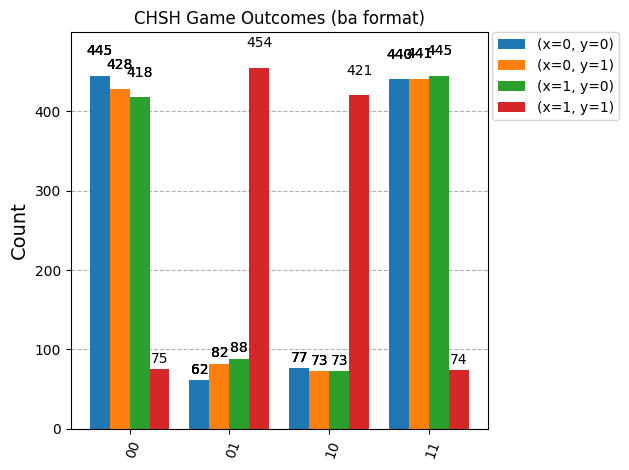

In [27]:
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Sampler
from qiskit.visualization import plot_histogram
from IPython.display import display

SHOTS = 1024

# Backend and pass manager
backend = AerSimulator()
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)

print("Preparing circuits for the simulator...")
# Transpile circuits with pass manager
isa_qc_chsh = pm.run(circuits)

# Create sampler with Aer backend
sampler_chsh = Sampler(mode=backend)

# Run sampler
job_chsh = sampler_chsh.run(isa_qc_chsh, shots=SHOTS)
results_chsh = job_chsh.result()

# Extract counts for each circuit
counts_list = [results_chsh[i].data.c.get_counts() for i in range(len(circuits))]

print("\n--- Simulation Results (Counts) ---")
for i, (x, y) in enumerate(input_pairs):
    print(f"Inputs (x={x}, y={y}):")
    sorted_counts = dict(sorted(counts_list[i].items()))
    print(f"  Outcomes (ba): {sorted_counts}")

print("\nPlotting results...")
display(plot_histogram(counts_list,
                       legend=[f'(x={x}, y={y})' for x, y in input_pairs],
                       title='CHSH Game Outcomes (ba format)'))


In [28]:
import numpy as np

win_probabilities = {}
print("--- Calculating Win Probabilities ---")

for i, (x, y) in enumerate(input_pairs):
    counts = counts_list[i]

    # ---- Task 1: Determine target a XOR b for winning ----
    # Win condition: a XOR b == x AND y
    target_xor_result = x & y  # bitwise AND

    # --- End of Task 1 ---

    wins_for_this_case = 0
    total_shots = sum(counts.values())

    # ---- Task 2: Count shots that satisfy the winning condition ----
    # counts keys are strings 'ba', where b = Bob's bit (c1), a = Alice's bit (c0)
    # So:
    # a = int(count_str[1])
    # b = int(count_str[0])
    for outcome, shot_count in counts.items():
        a = int(outcome[1])
        b = int(outcome[0])
        xor_result = a ^ b  # XOR
        if xor_result == target_xor_result:
            wins_for_this_case += shot_count

    # --- End of Task 2 ---

    prob = wins_for_this_case / total_shots if total_shots > 0 else 0
    win_probabilities[(x, y)] = prob
    print(f"Inputs (x={x}, y={y}): Target (a XOR b) = {target_xor_result}. Win Probability = {prob:.4f}")

avg_win_prob = sum(win_probabilities.values()) / 4.0
P_win_quantum_theory = np.cos(np.pi / 8)**2  # ~0.8536
P_win_classical_limit = 0.75

print("\n--- Overall Performance ---")
print(f"Experimental Average Win Probability: {avg_win_prob:.4f}")
print(f"Theoretical Quantum Win Probability: {P_win_quantum_theory:.4f}")
print(f"Classical Limit Win Probability:     {P_win_classical_limit:.4f}")

if avg_win_prob > P_win_classical_limit + 0.01:  # Allow small simulation variance
    print(f"\nSuccess! Your result ({avg_win_prob:.4f}) clearly beats the classical 75% limit!")
    print(f"It's likely close to the theoretical quantum prediction of {P_win_quantum_theory:.4f}.")
elif avg_win_prob > P_win_classical_limit - 0.02:
    print(f"\nClose, but no cigar? Your result ({avg_win_prob:.4f}) is around the classical limit ({P_win_classical_limit:.4f}).")
    print("Check your solutions for Exercises 1-4 carefully, especially the win counting logic in Ex 4.")
else:
    print(f"\nHmm, the result ({avg_win_prob:.4f}) is unexpectedly low, even below the classical limit.")
    print("There might be an error in Exercises 1-4. Please review your circuit and analysis code.")


--- Calculating Win Probabilities ---
Inputs (x=0, y=0): Target (a XOR b) = 0. Win Probability = 0.8643
Inputs (x=0, y=1): Target (a XOR b) = 0. Win Probability = 0.8486
Inputs (x=1, y=0): Target (a XOR b) = 0. Win Probability = 0.8428
Inputs (x=1, y=1): Target (a XOR b) = 1. Win Probability = 0.8545

--- Overall Performance ---
Experimental Average Win Probability: 0.8525
Theoretical Quantum Win Probability: 0.8536
Classical Limit Win Probability:     0.7500

Success! Your result (0.8525) clearly beats the classical 75% limit!
It's likely close to the theoretical quantum prediction of 0.8536.


In [42]:
# Submit your answer using the following code
grade_lab1_ex5(counts_list, avg_win_prob)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


Full Teleportation Circuit:


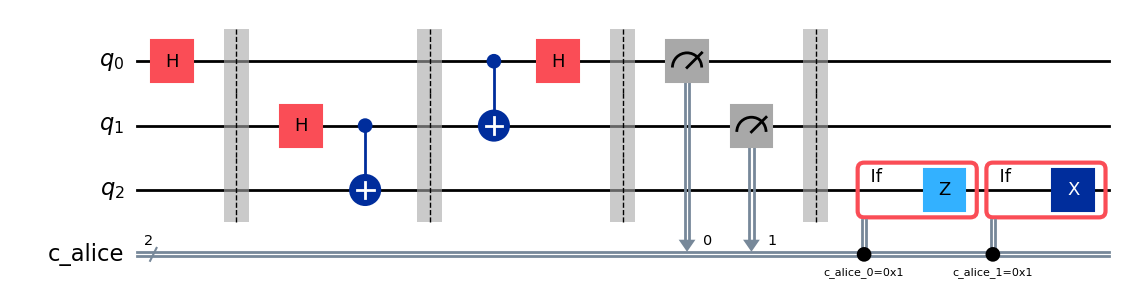

Submitting your answer. Please wait...
Oops 😕! Sorry, your answer is incorrect. Please try again.
Please review your answer and try again.


In [49]:
# Define quantum and classical registers
qr_tele = QuantumRegister(3, name='q')
cr_alice_tele = ClassicalRegister(2, name='c_alice') # For Alice's measurements

# Create the circuit
teleport_qc = QuantumCircuit(qr_tele, cr_alice_tele, name='Teleportation')

# Prepare Alice's message state |ψ> = |+> on q0
teleport_qc.h(qr_tele[0])
teleport_qc.barrier()

# ---- Task 1 ---
# Step 1: Create Bell pair between q1 (Alice) and q2 (Bob)
teleport_qc.h(qr_tele[1])
teleport_qc.cx(qr_tele[1], qr_tele[2])
teleport_qc.barrier()

# ---- Task 2 ---
# Step 2: Alice's Bell Measurement (gates part)
teleport_qc.cx(qr_tele[0], qr_tele[1])
teleport_qc.h(qr_tele[0])
teleport_qc.barrier()

# Alice measures her qubits q0 and q1
teleport_qc.measure(qr_tele[0], cr_alice_tele[0]) # q0 -> c0
teleport_qc.measure(qr_tele[1], cr_alice_tele[1]) # q1 -> c1
teleport_qc.barrier()

# ---- Task 3 ---
# Step 3: Bob's Conditional Corrections on q2
# New correct way to apply conditional gates:
with teleport_qc.if_test((cr_alice_tele[0], 1)):
    teleport_qc.z(qr_tele[2])
with teleport_qc.if_test((cr_alice_tele[1], 1)):
    teleport_qc.x(qr_tele[2])

print("Full Teleportation Circuit:")
display(teleport_qc.draw('mpl'))

# Submit to grader
grade_lab1_ex6(teleport_qc)

Using statevector simulator...
Running statevector simulation...
Simulation successful.
Statevector retrieved successfully.

Visualizing final qubit states (q2 should match initial q0 state |+>):


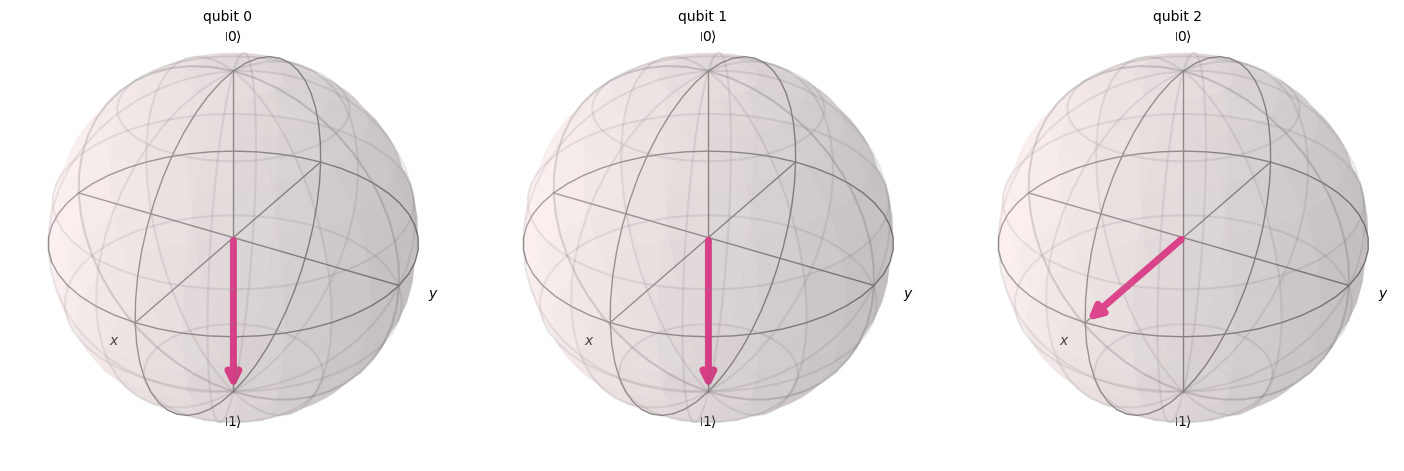


Verification:
Alice's initial state (q0) was |+> (X-axis on Bloch sphere)
Bob's final state (q2) should be |+> (X-axis on Bloch sphere)
The visualization should show q2 pointing in the +X direction

Partial state of Bob's qubit (q2):


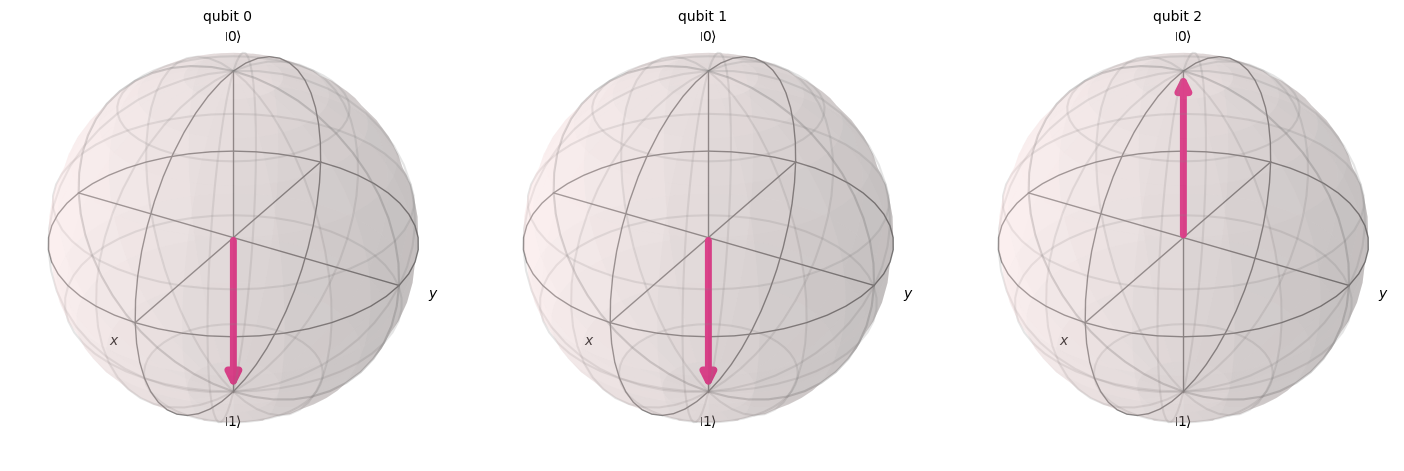

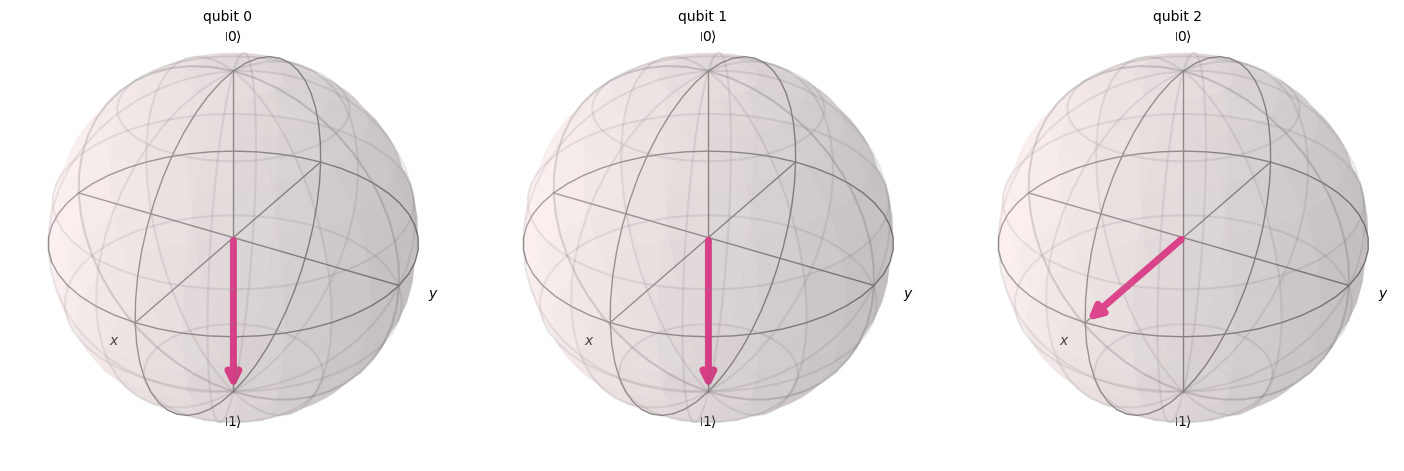

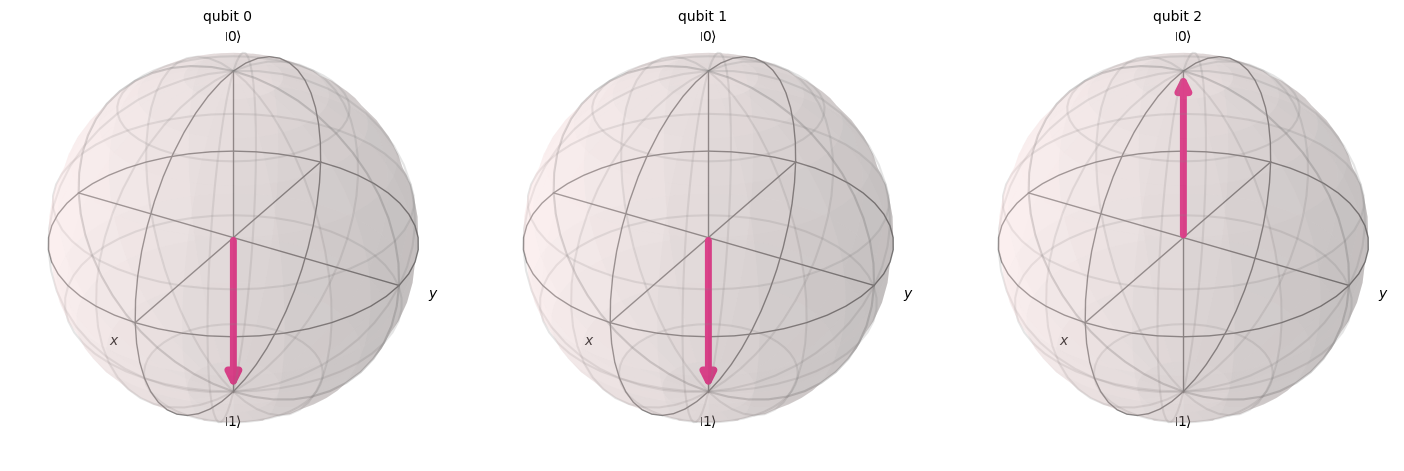

In [50]:
%matplotlib inline
from qiskit.visualization import plot_bloch_multivector
from qiskit_aer import AerSimulator

# Use Statevector Simulator
print("Using statevector simulator...")
sv_simulator = AerSimulator(method='statevector') # Explicitly set method for clarity
teleport_qc_sv = teleport_qc.copy() # Work with a copy for statevector simulation
teleport_qc_sv.save_statevector() # Save statevector at the end

print("Running statevector simulation...")
job_sv = sv_simulator.run(teleport_qc_sv) # shots=1 is default for statevector
result_sv = job_sv.result()

if result_sv.success:
    print("Simulation successful.")
    final_statevector = result_sv.get_statevector()
    print("Statevector retrieved successfully.")
    print("\nVisualizing final qubit states (q2 should match initial q0 state |+>):")
    # q0 was |+> (points along +X). After teleportation, q2 should be |+>.
    # q0 and q1 states are after Alice's measurement, so they'll be collapsed.
    
    # Visualize the final statevector
    display(plot_bloch_multivector(final_statevector))
    
    # Additional verification
    print("\nVerification:")
    print("Alice's initial state (q0) was |+> (X-axis on Bloch sphere)")
    print("Bob's final state (q2) should be |+> (X-axis on Bloch sphere)")
    print("The visualization should show q2 pointing in the +X direction")
    
    # For more detailed analysis
    from qiskit.quantum_info import Statevector
    sv = Statevector(final_statevector)
    print("\nPartial state of Bob's qubit (q2):")
    bob_state = sv.measure([2])[1]  # Measure just q2
    display(plot_bloch_multivector(bob_state))
    
else:
    print(f"Statevector simulation failed! Status: {result_sv.status}")

In [51]:
#Check your submission status with the code belowf
from qc_grader.grader.grade import check_lab_completion_status
check_lab_completion_status("qgss_2025")

Lab 0: 2/2 exercises completed (100%)
    ✅ 1771 participants have completed this lab
Lab 1: 8/9 exercises completed (89%)
    ✅ 1043 participants have completed this lab
Lab 2: 0/7 exercises completed (0%)
    ✅ 272 participants have completed this lab
Lab 3: 0/5 exercises completed (0%)
    ✅ 0 participants have completed this lab
Lab 4: 0/6 exercises completed (0%)
    ✅ 0 participants have completed this lab


In [52]:
# Check that the account has been saved properly
from qiskit_ibm_runtime import QiskitRuntimeService


service = QiskitRuntimeService(name="qgss-2025")
service.saved_accounts()

{'qgss-2025': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': 'j4MxUf6EZ0xR8RxcjXJ1w6MIfv1u-NoxO3AXSBGRiTIR',
  'instance': 'crn:v1:bluemix:public:quantum-computing:us-east:a/f45e667ab0174f6d860e44a5b8aea0af:f81a572d-0e39-446e-b820-3ada6c1ac0aa::',
  'verify': True,
  'private_endpoint': False}}